In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("gold_monthly_csv.csv")

In [3]:
data.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
data.shape

(847, 2)

In [5]:
print(f"Date range of gold prices are avalable from {data.loc[:, "Date"][0]} to {data.loc[:, "Date"][len(data)-1]}")

Date range of gold prices are avalable from 1950-01 to 2020-07


In [6]:
date = pd.date_range(start = "1/1/1950", end = "8/1/2020", freq = "M")
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [7]:
data["Month"] = date
data.drop("Date", axis = 1, inplace = True)
data = data.set_index("Month")
data.head()

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


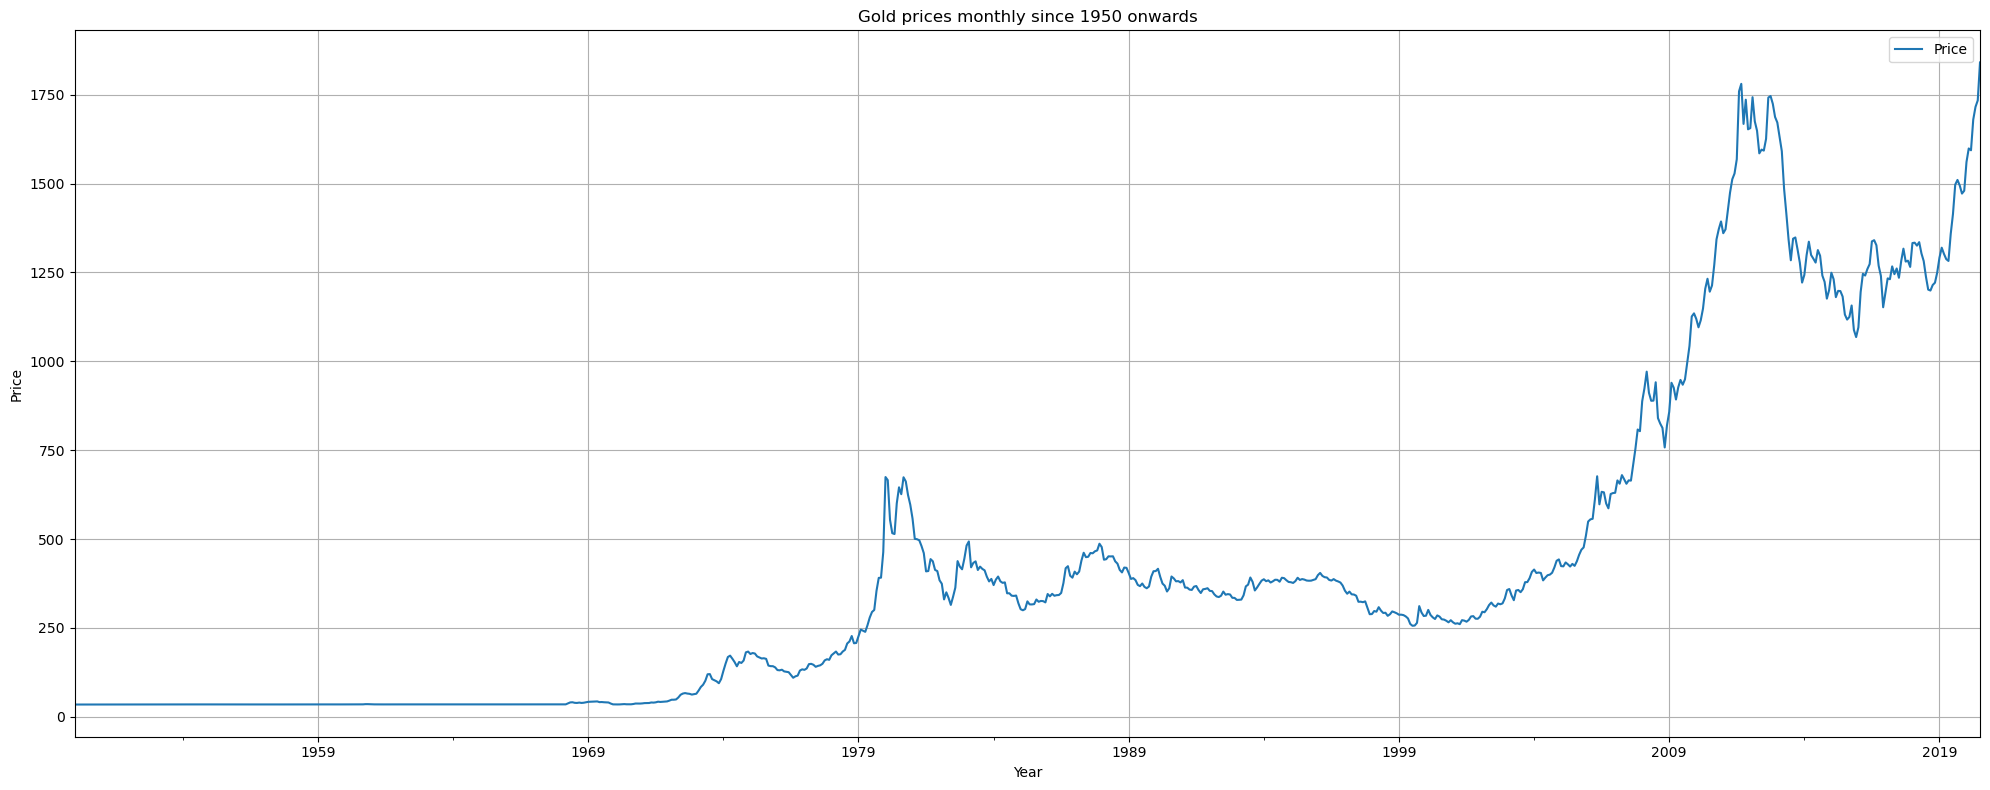

In [8]:
data.plot(figsize = (20, 8))
plt.title("Gold prices monthly since 1950 onwards")
plt.xlabel("Year")
plt.ylabel("Price")
plt.tight_layout()
plt.grid()

In [9]:
data.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


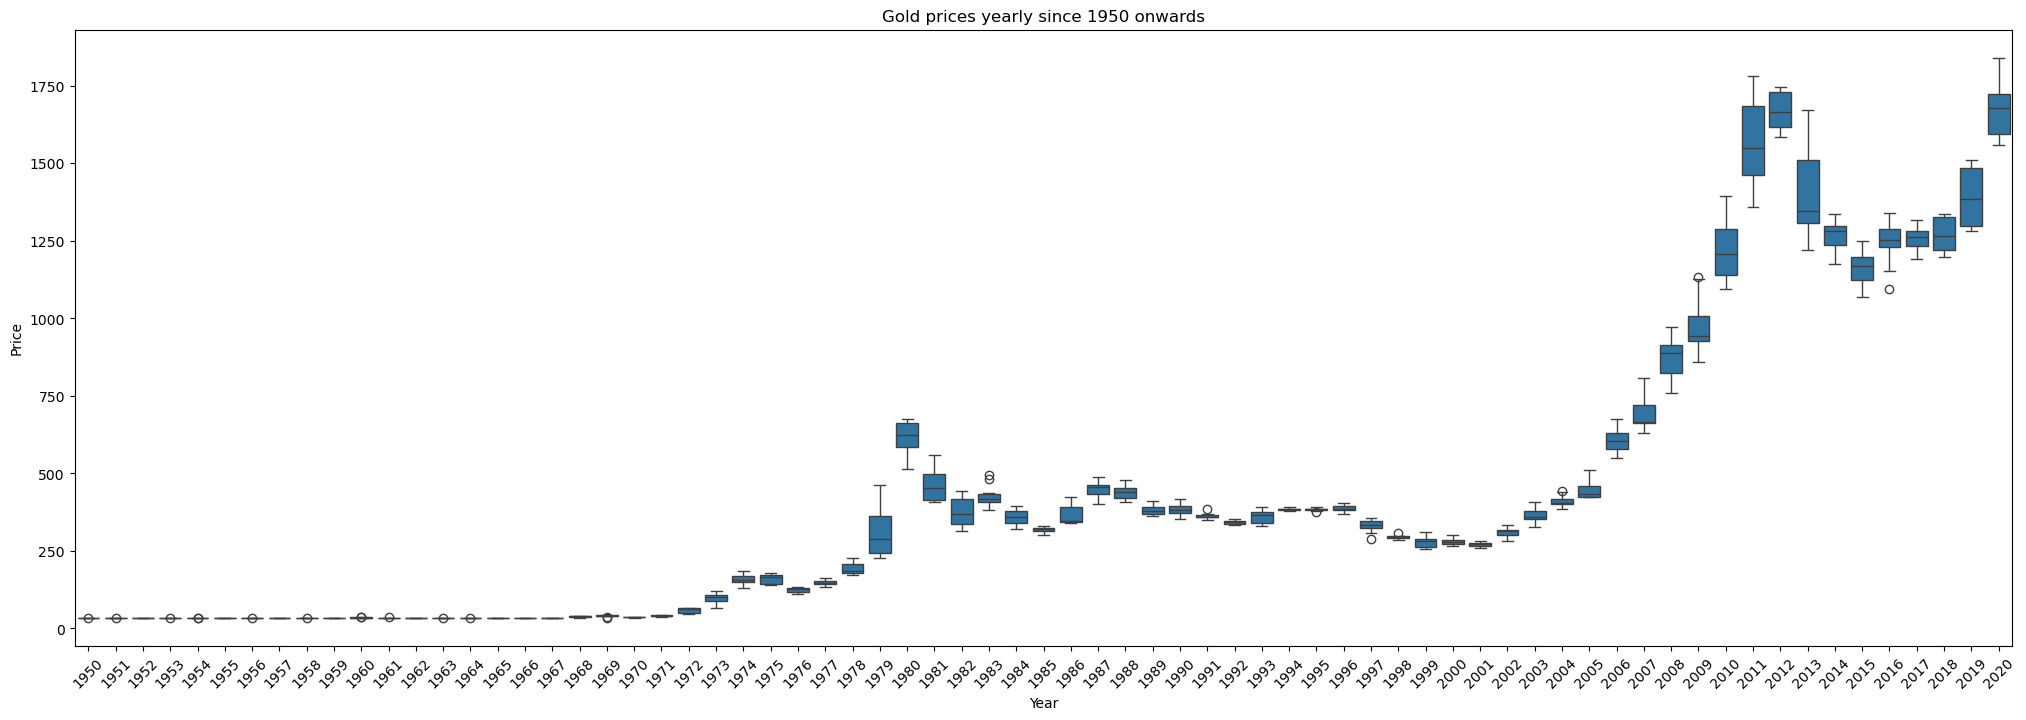

In [10]:
_, ax = plt.subplots(figsize = (25, 8))
sns.boxplot(x = data.index.year, y = data.values[:, 0], ax = ax)
plt.title("Gold prices yearly since 1950 onwards")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation = 45)
plt.show()

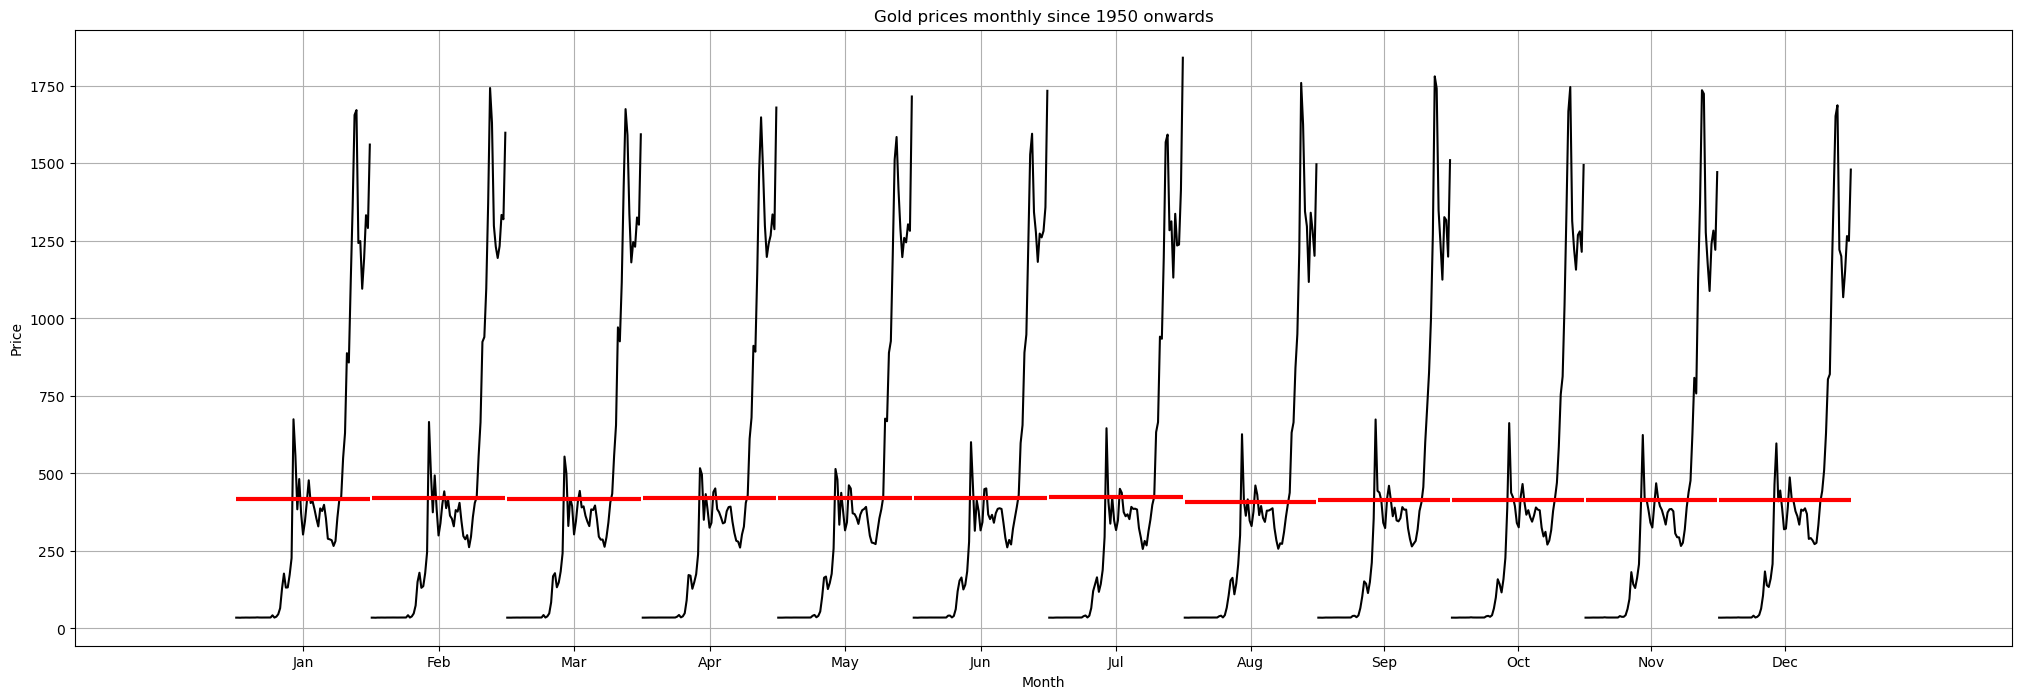

In [11]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize = (25, 8))
month_plot(data, ylabel = "Gold Prices", ax = ax)
plt.title("Gold prices monthly since 1950 onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid()

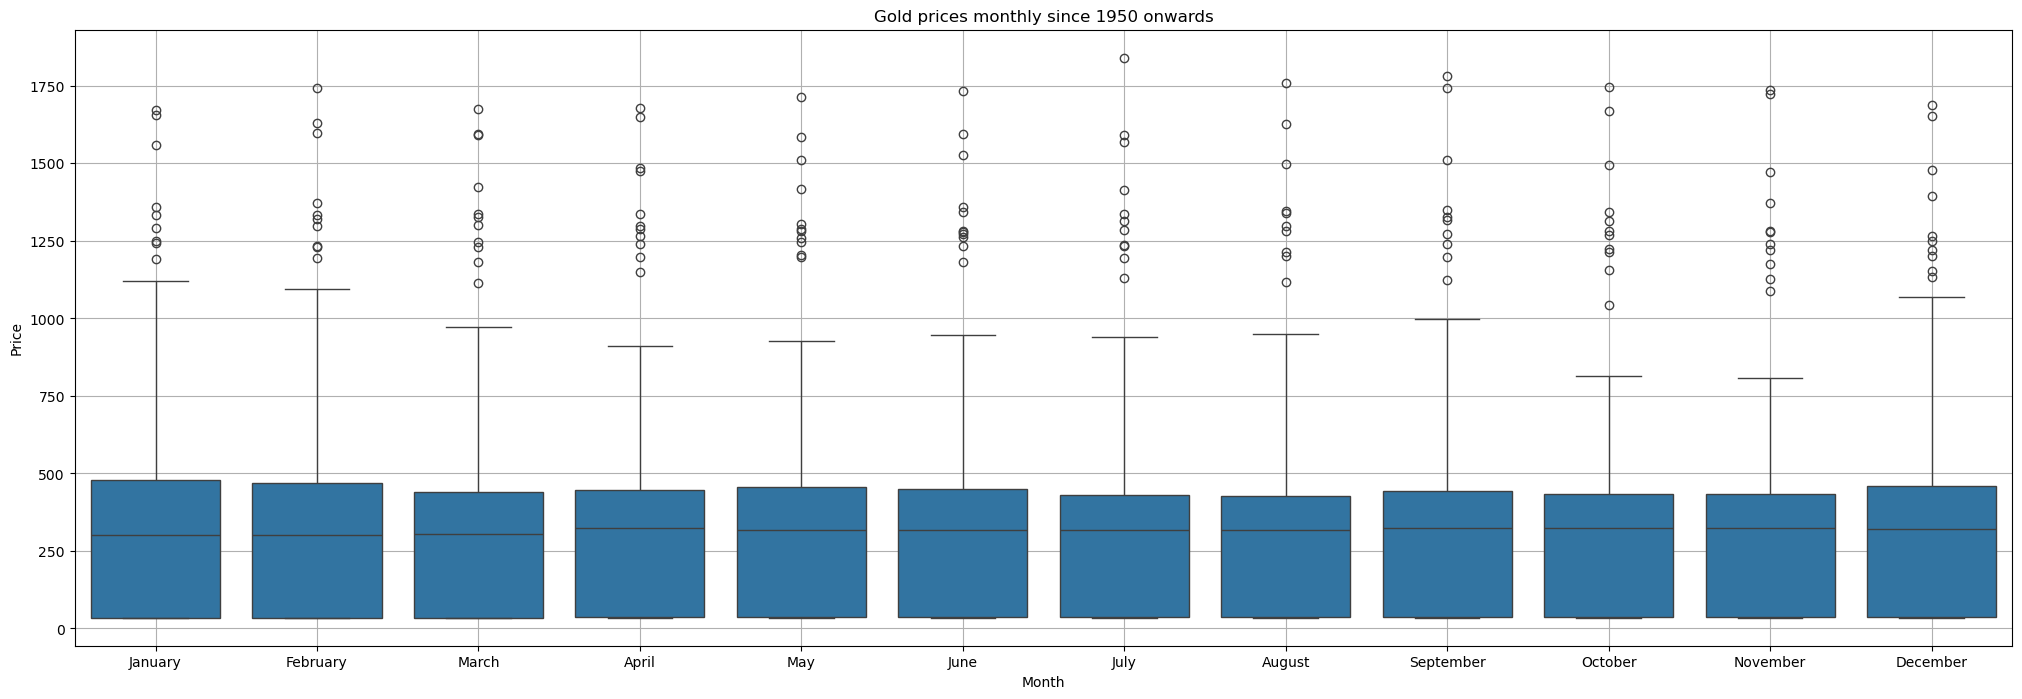

In [12]:
_, ax = plt.subplots(figsize = (25, 8))
sns.boxplot(x = data.index.month_name(), y = data.values[:, 0], ax = ax)
plt.title("Gold prices monthly since 1950 onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid()
plt.show()

Text(0, 0.5, 'Price')

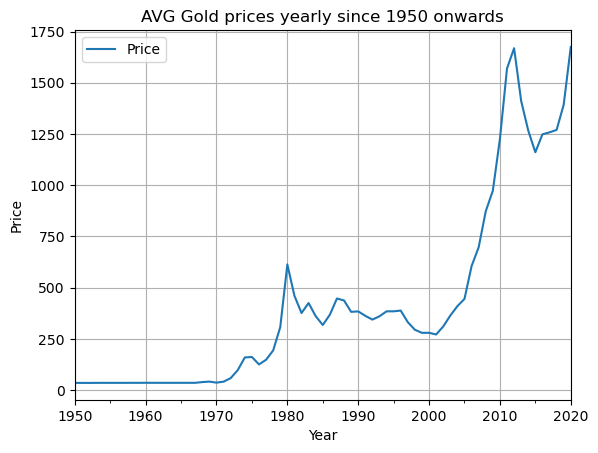

In [13]:
Yearly_avg = data.resample("A").mean()
Yearly_avg.plot()
plt.title("AVG Gold prices yearly since 1950 onwards")
plt.xlabel("Year")
plt.grid()
plt.ylabel("Price")

Text(0, 0.5, 'Price')

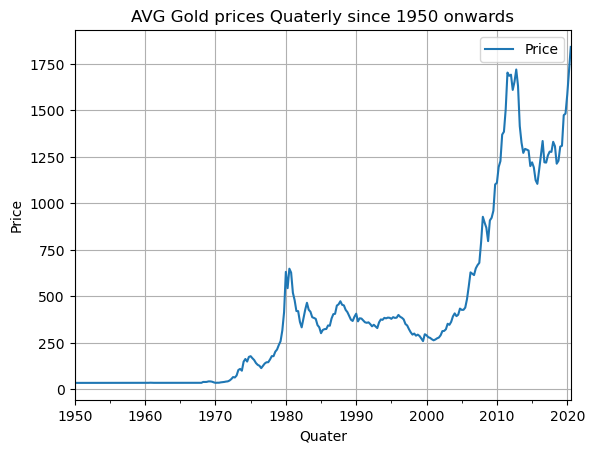

In [14]:
Quaterly_avg = data.resample("Q").mean()
Quaterly_avg.plot()
plt.title("AVG Gold prices Quaterly since 1950 onwards")
plt.xlabel("Quater")
plt.grid()
plt.ylabel("Price")

Text(0, 0.5, 'Price')

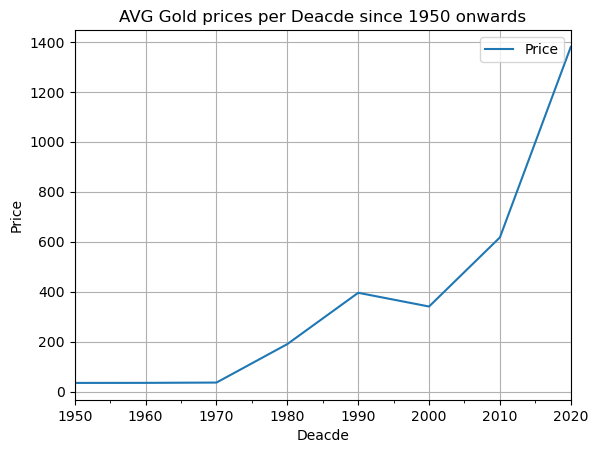

In [15]:
Deacde_avg = data.resample("10Y").mean()
Deacde_avg.plot()
plt.title("AVG Gold prices per Deacde since 1950 onwards")
plt.xlabel("Deacde")
plt.grid()
plt.ylabel("Price")

In [16]:
data_1 = data.groupby(data.index.year).mean().rename(columns = {"Price" : "Mean"})
data_1 = data_1.merge(data.groupby(data.index.year).std().rename(columns = {"Price" : "std"}), left_index = True, right_index = True)
data_1["Cov"] = ((data_1["std"]/data_1["Mean"])*100).round(2)

In [17]:
data_1.head()

,Mean,std,Cov
Month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


Text(0, 0.5, 'Cov')

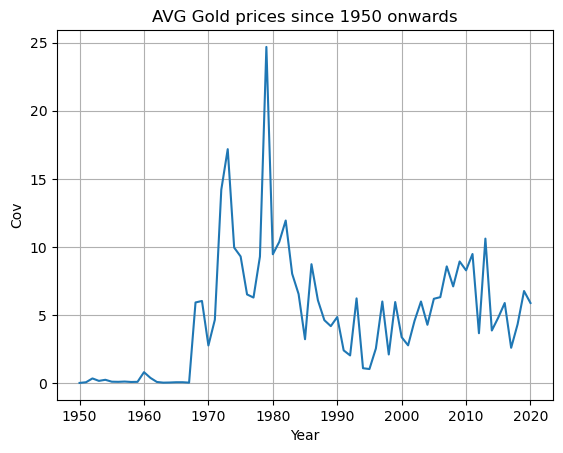

In [18]:
plt.plot(figsize = (15, 10))
data_1["Cov"].plot()
plt.title("AVG Gold prices since 1950 onwards")
plt.xlabel("Year")
plt.grid()
plt.ylabel("Cov")

In [19]:
train = data[data.index.year <= 2015]
test = data[data.index.year > 2015]

In [20]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


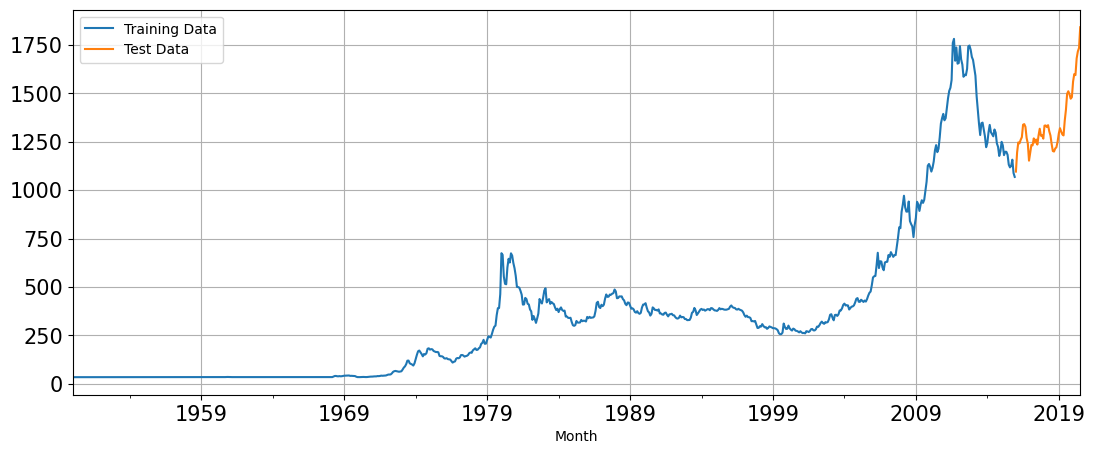

In [21]:
train["Price"].plot(figsize = (13, 5), fontsize = 15)
test["Price"].plot(figsize = (13, 5), fontsize = 15)
plt.grid()
plt.legend(["Training Data", "Test Data"])
plt.show()

In [22]:
train_time = [i + 1 for i in range(len(train))]
test_time = [i + len(train) + 1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [23]:
lr_train = train.copy()
lr_test = test.copy()

In [24]:
lr_train["Time"] = train_time
lr_test["Time"] = test_time

In [25]:
lr = LinearRegression()
lr.fit(lr_train[["Time"]],lr_train["Price"].values )

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
test_prediction_model = lr.predict(lr_test[["Time"]])
lr_test["Forecast"] = test_prediction_model

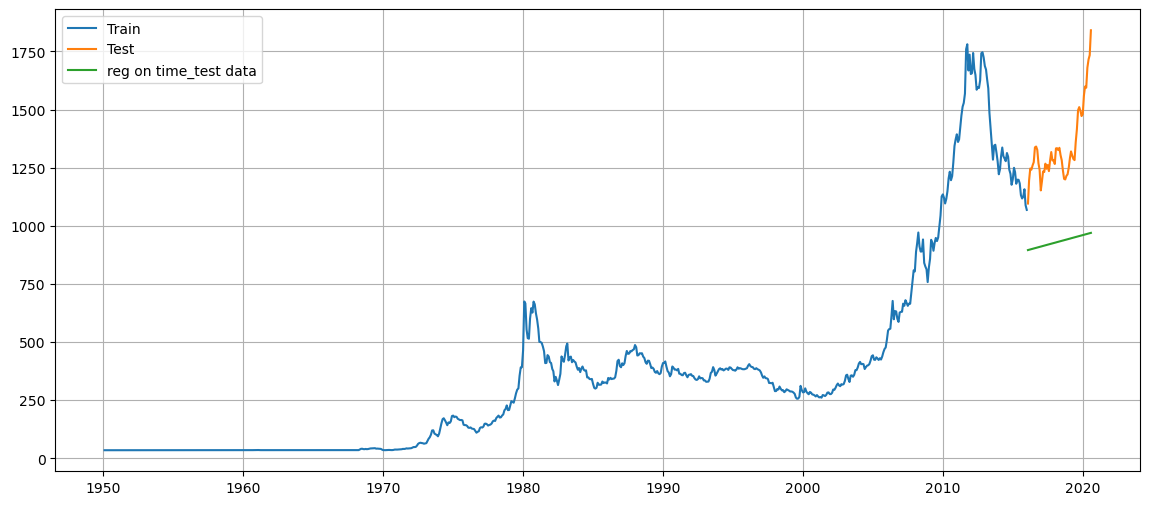

In [27]:
plt.figure(figsize = (14, 6))
plt.plot(train["Price"], label = "Train")
plt.plot(test["Price"], label = "Test")
plt.plot(lr_test["Forecast"], label = "reg on time_test data")
plt.legend(loc = "best")
plt.grid()

In [28]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred) / actual))*100)

In [32]:
mape_model1_test = mape(test["Price"].values, test_prediction_model)
print("MAPE id %3.3f"%(mape_model1_test), "%")

MAPE id 30.000 %


In [40]:
result = pd.DataFrame({"Test Mape % :": [mape_model1_test]}, index=["RegressionOnTime"])

In [42]:
result

,Test Mape % :
RegressionOnTime,30


In [52]:
Naive_train = train.copy()
Naive_test =  test.copy()

In [58]:
Naive_test["naive"] = np.asarray(train["Price"])[len(np.asarray(train["Price"])) - 1]
Naive_test["naive"].head()

Month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

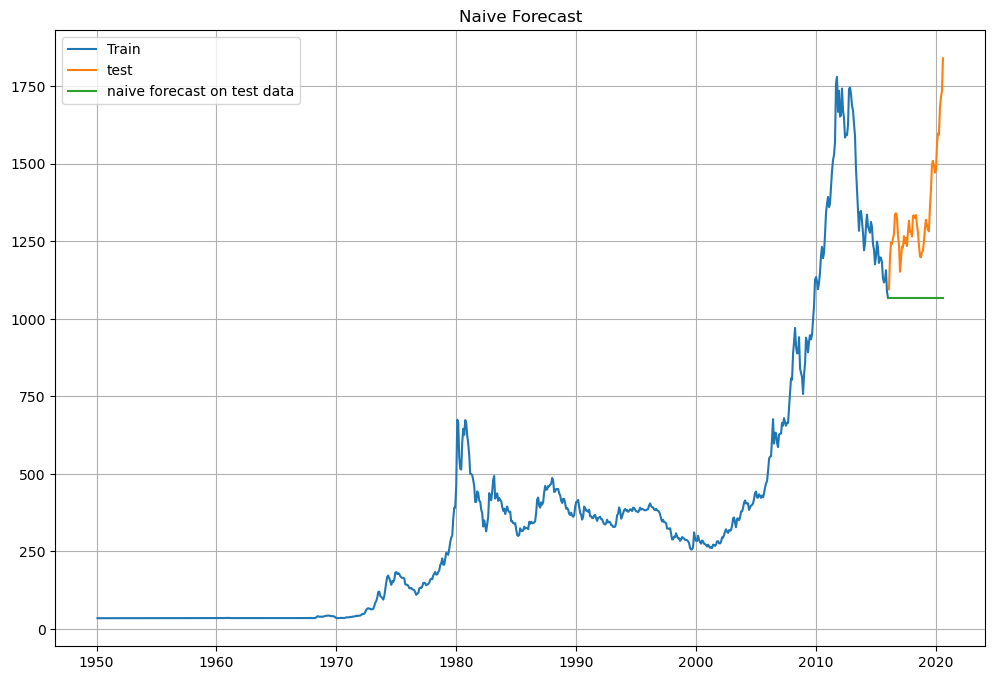

In [62]:
plt.figure(figsize = (12, 8))
plt.plot(Naive_train["Price"], label = "Train")
plt.plot(test["Price"], label = "test")
plt.plot(Naive_test["naive"], label = "naive forecast on test data")
plt.legend(loc = "best")
plt.title("Naive Forecast")
plt.grid()
plt.show()

In [66]:
mape_model2_test = mape(test["Price"].values, Naive_test["naive"].values)
print("for Naive forecast on the test data, MAPE is %3.3f" %(mape_model2_test), "%")

for Naive forecast on the test data, MAPE is 19.000 %


In [70]:
result_df2 = pd.DataFrame({"Test MAPE (%)" : [mape_model2_test]}, index = ["NaiveModel"])
result = pd.concat([result, result_df2])

In [72]:
result

,Test Mape % :,Test MAPE (%)
RegressionOnTime,30.0,NaN
NaiveModel,NaN,19.0


In [74]:
final_model = ExponentialSmoothing(data, trend = "additive", seasonal = "additive").fit(smoothing_level = 0.4,
                                                                                     smoothing_trend = 0.3,
                                                                                       smoothing_seasonal = 0.6)

In [80]:
Mape_final_model = mape(data["Price"].values, final_model.fittedvalues)
print("MAPE :", Mape_final_model)

MAPE : 17


In [82]:
prediction = final_model.forecast(steps = len(test))

In [88]:
pred_df = pd.DataFrame({
    "lower_CI": prediction - 1.96 * np.std(final_model.resid, ddof=1),
    "prediction": prediction,
    "upper_CI": prediction + 1.96 * np.std(final_model.resid, ddof=1)
})

In [90]:
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


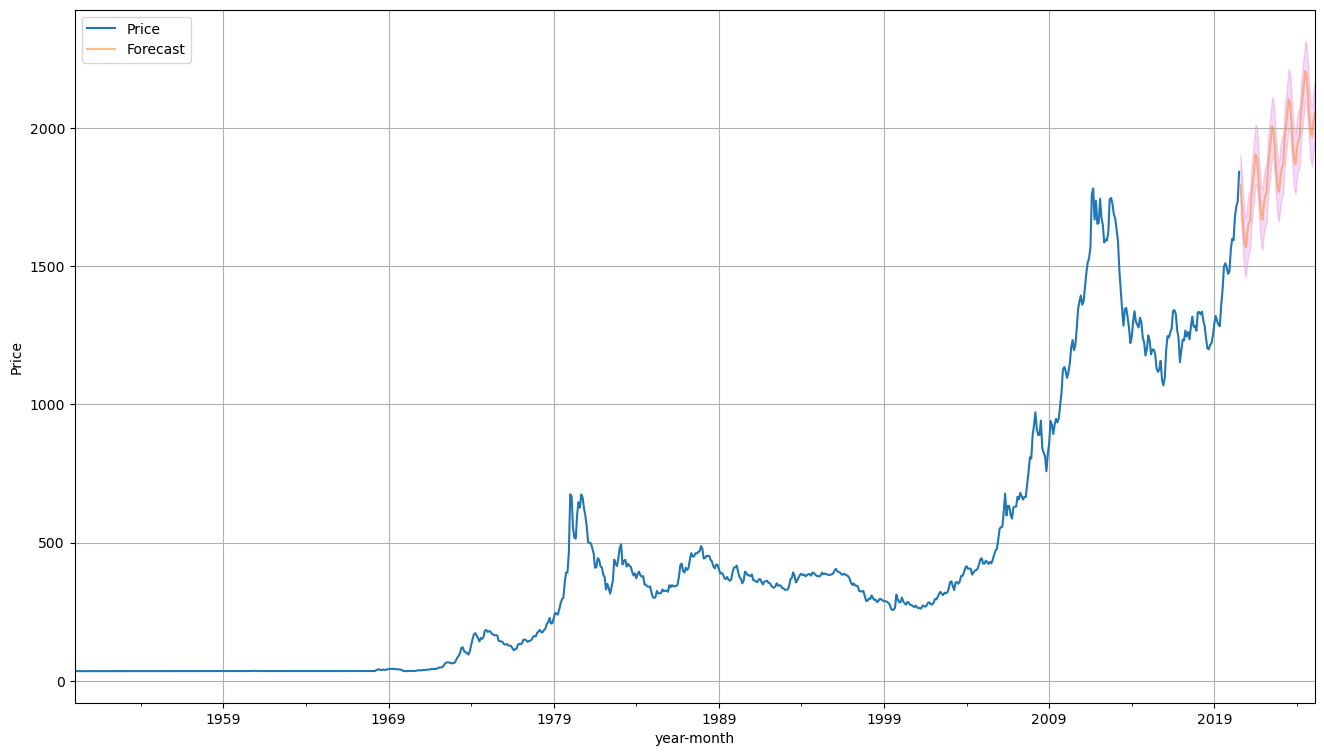

In [100]:
axis = data.plot(label = "Actual", figsize = (16, 9))
pred_df["prediction"].plot(ax = axis, label = "Forecast", alpha = 0.5)
axis.fill_between(pred_df.index, pred_df["lower_CI"], pred_df["upper_CI"], color = "m", alpha = .15)
axis.set_xlabel("year-month")
axis.set_ylabel("Price")
plt.legend(loc = "best")
plt.grid()
plt.show()